# Chapter 3 Clasification (p.83)
## Preparation

In [44]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


In [45]:
### pip install keras (事前にインストールしておく)
### pip install tensorflow (こちらも要るかも？)

# MNIST (p.83)

In [46]:
from keras.datasets import mnist

In [47]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(60000,784)/255
X_test=X_test.reshape(10000,784)/255

In [48]:
X_train.shape

(60000, 784)

In [49]:
y_train.shape

(60000,)

In [50]:
X_test.shape

(10000, 784)

In [51]:
y_test.shape

(10000,)

In [52]:
28*28

784

In [53]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')


In [54]:
#some_digit = X[36000] in book
idx=36000
size=28
a,b=np.meshgrid(range(size),range(size))
some_digit_image=X_train[idx].reshape(size,size)
some_digit_image=some_digit_image[::-1,:]
print('number:{}'.format(y_train[idx]))



number:9


Saving figure some_digit_plot


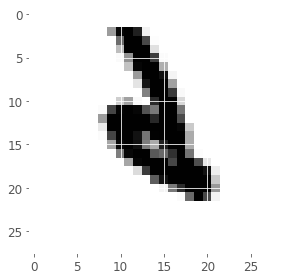

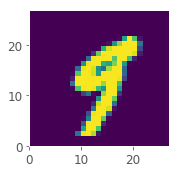

In [55]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
#plt.axis("off")
save_fig("some_digit_plot")
plt.show()

plt.figure(figsize=(2.5,2.5))
plt.xlim(0,27)
plt.ylim(0,27)
plt.pcolor(a,b,some_digit_image)


In [56]:
y_train[36000]

9

In [57]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


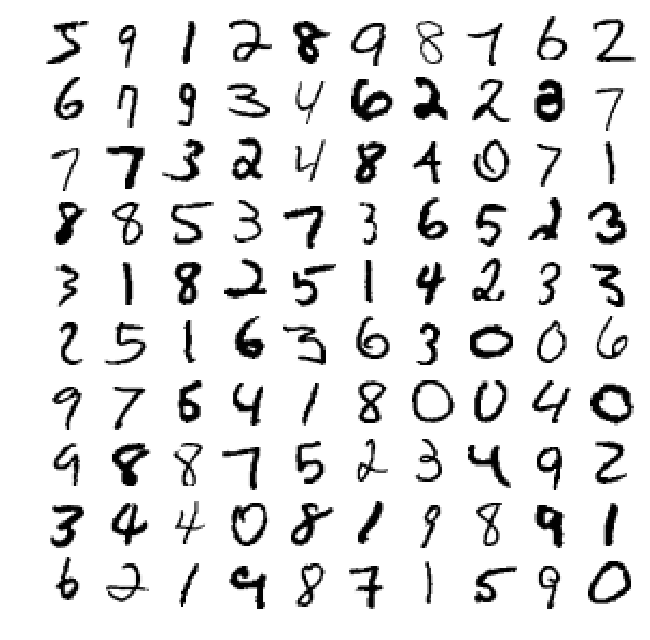

In [58]:
plt.figure(figsize=(9,9))
example_images = np.r_[X_train[:12000:600], X_train[13000:30600:600], X_train[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [59]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a binary classifier(p.87)

手書き画像5データのみ抽出

In [60]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


確率的勾配降下法(Stochastic Gradient Descent classifier)を使う
https://ja.wikipedia.org/wiki/%E7%A2%BA%E7%8E%87%E7%9A%84%E5%8B%BE%E9%85%8D%E9%99%8D%E4%B8%8B%E6%B3%95

In [61]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

MNIST X_train[36000]="9"だったので手書き5画像モデルの予測値はFalseとなった

In [63]:
sgd_clf.predict([X_train[36000]])

array([False], dtype=bool)

# Performance measures (p.88)

cross validationで手書き5予測モデルの精度を求める

In [64]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9701 ,  0.97   ,  0.97125])

In [65]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9701
0.97
0.97125


5でないクラス(1-4,6-9)の精度を求める。

In [68]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [67]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.909  ,  0.90745,  0.9125 ])

# Confusion Matrix　(p.89)

In [69]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [70]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53943,   636],
       [ 1137,  4284]])

In [71]:
y_train_perfect_predictions = y_train_5

In [72]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])